# Loteca

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Ler arquivo

In [2]:
df = pd.read_csv("BRA.csv")

In [3]:
df.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/12,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/12,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/12,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/12,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/12,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


### Frequencia de vitórias em casa (H), empates (D) e visitantes (A)

<BarContainer object of 3 artists>

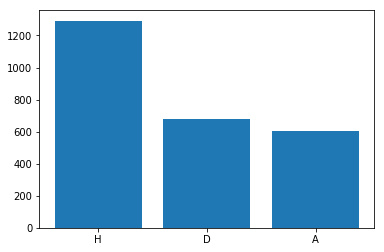

In [4]:
plt.bar(df['Res'].value_counts().keys(),df['Res'].value_counts())

In [5]:
df[df['Res']=='H'].groupby(['Home'])['Home'].count().sort_values(ascending=False)

Home
Atletico-MG       82
Gremio            81
Santos            77
Corinthians       75
Sao Paulo         73
Cruzeiro          72
Flamengo RJ       68
Atletico-PR       66
Internacional     65
Fluminense        63
Palmeiras         60
Botafogo RJ       53
Sport Recife      53
Coritiba          53
Ponte Preta       46
Chapecoense-SC    41
Vasco             38
Bahia             35
Vitoria           35
Goias             27
Figueirense       26
Nautico           16
Portuguesa        16
Criciuma          15
Avai              13
America MG        13
Atletico GO        9
Santa Cruz         7
Joinville          6
Ceara              5
Parana             3
Name: Home, dtype: int64

In [6]:
H = df[df['Res']=='H'].groupby(['Home'])['Home'].count().sort_values(ascending=False)

In [7]:
A = df[df['Res']=='A'].groupby(['Away'])['Away'].count().sort_values(ascending=False)

In [8]:
(H + A).sort_values(ascending=False)

Gremio            121.0
Atletico-MG       117.0
Cruzeiro          116.0
Corinthians       114.0
Sao Paulo         113.0
Santos            109.0
Flamengo RJ       105.0
Fluminense        100.0
Palmeiras          96.0
Internacional      89.0
Atletico-PR        89.0
Botafogo RJ        80.0
Sport Recife       72.0
Coritiba           71.0
Vasco              60.0
Ponte Preta        59.0
Chapecoense-SC     58.0
Vitoria            58.0
Bahia              54.0
Figueirense        39.0
Goias              39.0
Portuguesa         22.0
Avai               21.0
Criciuma           20.0
Nautico            19.0
Atletico GO        16.0
America MG         15.0
Santa Cruz          8.0
Joinville           7.0
Ceara               7.0
Parana              NaN
dtype: float64

### Nomes dos times

In [9]:
vocab = df['Home'].unique()

### Transformar em índices

In [10]:
word2idx = {word: i for i, word in enumerate(vocab)}

In [11]:
def word2vector(word):
    m = np.zeros(len(word2idx))
    m[word2idx.get(word)] = 1
    return m

In [12]:
# Transforma os dois times em um vetor com o flag do time correspondente
def prepare(H,A):
    vec = [word2vector(H), word2vector(A)]
    return np.array(vec).reshape(np.array(vec).shape[1]*2)

### Função para indexar os jogos

In [13]:
def text_to_vector2(text): 
    return word2idx.get(text, None)


### Indexar os resultados

In [14]:
X = []
y = []

for _, row in df.iterrows():
    X.append(prepare(row['Home'], row['Away']))    
    n = -row['HG'] + row['AG']
    
    if np.isnan(n):
        n = 0
    
    y.append(n)
    
# X = np.array(X).reshape(np.array(X).shape[0],np.array(X).shape[2]*2)

In [15]:
np.array(X).shape

(2579, 62)

### Separar os datasets de treinamento e teste

### Suport vector machine

In [16]:
from sklearn.svm import SVR
model = SVR(gamma='scale', C=5.0, epsilon=0.2)

### Random forest

In [17]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.datasets import make_regression
# model = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)

### Treinar o modelo

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)

In [19]:
model.fit(X_train, y_train)

SVR(C=5.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Avaliar precisão

In [20]:
res = []
for j in range(len(X_test)):
    r = model.predict([X_test[j]])
    res.append(round(r[0],0) - y_test[j])
print(round((1 - abs(np.mean(res))) * 100,0), '%')

96.0 %


### Loop para atingir maxima precisão

In [22]:
while True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
    
    model.fit(X_train, y_train)
    
    res = []
    for j in range(len(X_test)):
        r = model.predict([X_test[j]])
        res.append(round(r[0],0) - y_test[j])
    p = round((1 - abs(np.mean(res))) * 100,0)
    print(p)
    
    if p >= 100:
        break
        
print(round((1 - abs(np.mean(res))) * 100,0), '%')

93.0
96.0
93.0
98.0
89.0
98.0
98.0
92.0
94.0
98.0
96.0
99.0
90.0
94.0
81.0
92.0
99.0
97.0
97.0
95.0
97.0
91.0
94.0
100.0
100.0 %


### Salvar o modelo

In [21]:
from sklearn.externals import joblib

In [22]:
joblib.dump(model, 'model.joblib')

['model.joblib']

In [23]:
model = joblib.load('model.joblib') 

### Lista de times

In [24]:
from flask import jsonify

In [25]:
d = {}

In [26]:
d['teams'] = vocab.tolist()

In [27]:
import json


In [28]:
json.dumps(d)

'{"teams": ["Palmeiras", "Sport Recife", "Figueirense", "Botafogo RJ", "Corinthians", "Internacional", "Ponte Preta", "Bahia", "Cruzeiro", "Vasco", "Atletico GO", "Flamengo RJ", "Portuguesa", "Nautico", "Atletico-MG", "Coritiba", "Santos", "Sao Paulo", "Fluminense", "Gremio", "Vitoria", "Criciuma", "Atletico-PR", "Goias", "Chapecoense-SC", "Avai", "Joinville", "Santa Cruz", "America MG", "Parana", "Ceara"]}'

In [29]:
vocab

array(['Palmeiras', 'Sport Recife', 'Figueirense', 'Botafogo RJ',
       'Corinthians', 'Internacional', 'Ponte Preta', 'Bahia', 'Cruzeiro',
       'Vasco', 'Atletico GO', 'Flamengo RJ', 'Portuguesa', 'Nautico',
       'Atletico-MG', 'Coritiba', 'Santos', 'Sao Paulo', 'Fluminense',
       'Gremio', 'Vitoria', 'Criciuma', 'Atletico-PR', 'Goias',
       'Chapecoense-SC', 'Avai', 'Joinville', 'Santa Cruz', 'America MG',
       'Parana', 'Ceara'], dtype=object)

### Realizar previsão

In [40]:
H = 'Santos'
A = 'Palmeiras'

p = model.predict([prepare(H,A)])

if p < 0:
    print(H, 'Vence com ', round(abs(p[0]),3),' gol de diferença')
else:
    print(A, 'Vence com', round(abs(p[0]),3),' gol de diferença')

Santos Vence com  0.8  gol de diferença


In [31]:
r = {}

r["H"]=H
r["A"]=A
r["p"]=p[0]

In [32]:
r

{'H': 'Ceara', 'A': 'Atletico-MG', 'p': 0.27202188885785183}